## Scénario

Vous êtes consultant chez Lapage, une grande librairie généraliste en ligne très réputée. Vous êtes directement rattaché au service Marketing.Lapage était originellement une librairie physique avec plusieurs points de vente. Mais devant le succès de certains de ses produits et l’engouement de ses clients, elle a décidé depuis 2 ans d’ouvrir un site de vente en ligne. Vous intervenez car l’entreprise souhaite faire le point après deux ans d’exercice, et pouvoir analyser ses points forts, ses points faibles, les comportements clients, etc.
Nous aimerions faire le point à présent. Cela nous permettra de décider de la marche à suivre, par exemple décider si nous devons créer certaines offres, adapter certains prix, etc.

Cette analyse va être découpée en deux parties :

- Une analyse des différents indicateurs de vente, qui a été demandée directement.
  * Dans un premier temps, on vait avoir besoin de différents indicateurs et graphiques autour du chiffre d'affaires. Peux-tu également regarder l’évolution dans le temps et mettre en place une décomposition en moyenne mobile pour évaluer la tendance globale ? Il serait également intéressant de faire un zoom sur les références, pour voir un peu les tops et lesflops,  la répartition par catégorie, etc.
  * Enfin, on aimera avoir quelques informations sur les profils de nos clients, et également la répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz.
  
- Une analyse plus ciblée sur les clients : l’objectif serait cette fois-ci de comprendre le comportement de nos clients en ligne, pour pouvoir ensuite comparer avec la connaissance acquise via nos librairies physiques. On aimera que tu regardes en particulier : 
  * le lien entre le genre d’un client et les catégories des livres achetés ; 
  * et ensuite le lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés.
   

## Remarques :
- Détail du nettoyage des données : vous présenterez l’ensemble des choix et actions que vous avez réalisés afin d’obtenir un jeu de données exploitable.
- Restitution de l’analyse : les chiffres clés, KPI, graphiques générés, corrélations calculées, etc. ( le calcul de l’indicateur de corrélation (R², eta², Chi²) et la mise en place d’un test statistique est nécessaire )

## Ressources :
- Réalisez des graphiques compréhensibles https://openclassrooms.com/fr/courses/4525336-realisez-des-rapports-statistiques-clairs-et-impactants/5193755-choisissez-des-graphiques-adaptes-a-votre-message
- Maitrisez les bases des probabilites https://openclassrooms.com/fr/courses/4525296-maitrisez-les-bases-des-probabilites
- Realisez des rapports statistiques clairs et impactants https://openclassrooms.com/fr/courses/4525336-realisez-des-rapports-statistiques-clairs-et-impactants
- Initiez vous a la statistique inferentielle  https://openclassrooms.com/fr/courses/4525306-initiez-vous-a-la-statistique-inferentielle

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
#ls

In [64]:
# import 
df_custtomers=pd.read_csv('Data/customers.csv')
print(df_custtomers.shape)
df_custtomers.head()

(8623, 3)


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
df_custtomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
df_custtomers['client_id'].nunique()

8623

In [6]:
#Vérification rapide de la cohérence des âges clients
df_custtomers.sort_values(by='birth', ascending=False).head()

,client_id,sex,birth
1920,c_3923,f,2004
1090,c_962,m,2004
8209,c_5316,f,2004
889,c_3185,m,2004
891,c_184,m,2004


In [7]:
df_custtomers.sort_values(by='birth', ascending=True).head()

,client_id,sex,birth
4569,c_577,m,1929
2491,c_8362,f,1929
418,c_5302,m,1929
1086,c_3218,f,1930
5138,c_7232,f,1930


In [8]:
#2023-2004

**Les plus jeunes clients ont 19 ans, les plus âgés 94 ans. Aucune anomalie.**

**Unicité de Clé 'client_id'**

In [9]:
# import 
df_products=pd.read_csv('Data/products.csv')
print(df_products.shape)
df_products.head()

(3287, 3)


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [10]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


**Il y a pas des valeurs manquantes**

In [11]:
df_products['categ'].unique()

array([0, 1, 2], dtype=int64)

In [12]:
df_products.groupby('categ').mean()

,price
categ,
0,11.727280
1,25.531421
2,108.354686


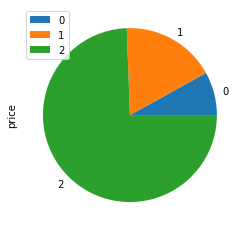

In [13]:
df_products.groupby('categ').mean().reset_index().plot.pie(y='price')
plt.show()

**Les produits sont répartis en 3 catégories, ayant des prix moyens différents.**

- **Pourquoi ?** (à vous de repondre à cette question )

In [14]:
df_products['price'].min()

-1.0

In [15]:
df_products['price'].max()

300.0

In [16]:
df_products.sort_values('price', ascending = True).head()

,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0


**Le produit “T_0” a un prix est de -1**

In [17]:
#supprimer les valeurs de "price" négative 
df_products = df_products[df_products.id_prod != 'T_0']

In [18]:
df_products.shape

(3286, 3)

In [19]:
df_products['id_prod'].nunique()

3286

In [20]:
#df_products[df_products['price'].isnull()]

**Unicité de clé 'id_prod' pour le dataset df_products**

In [21]:
# import 
df_transactions=pd.read_csv('Data/transactions.csv')
print(df_transactions.shape)
df_transactions.head()

(679532, 4)


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [22]:
df_transactions[df_transactions['id_prod']=='T_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [23]:
df_transactions[df_transactions['id_prod']=='T_0'].shape

(200, 4)

In [24]:
df_transactions[df_transactions['id_prod']=='T_0']['client_id'].unique()

array(['ct_0', 'ct_1'], dtype=object)

**Les transactions de test sont présentes dans la table transactions. Ces transactions interviennent toutes le 2021-03-01 ,
et sont réalisées avec deux comptes clients, “ct_0” et “ct_1”, sur le produit “T_0” dont le prix est de -1. De plus, 
les dates enregistrées pour ces transactions sont mal formatées (ex. : “test_2021-03-01 02:30:02.237420”).**


In [25]:
df_transactions['id_prod'].nunique()

3267

**'id_prod' n'est pas unique dans df_transactions est c'est normal**

In [26]:
df_transactions=df_transactions[df_transactions['id_prod']!='T_0']

In [27]:
df_transactions.describe()

,id_prod,date,session_id,client_id
count,679332,679332,679332,679332
unique,3266,679332,342315,8600
top,1_369,2022-04-25 05:39:20.007453,s_118668,c_1609
freq,2252,1,14,25488


In [81]:
df_merge1=df_transactions.merge(df_custtomers,how='outer',indicator=True)

In [83]:
#df_merge1[df_merge1['_merge']!='both']

In [84]:
df_merge1[df_merge1['_merge']!='both']['_merge'].unique()

['right_only']
Categories (1, object): ['right_only']

**23 client n'ont pas un id_prod**

In [85]:
df_merge1=df_merge1[df_merge1['_merge']=='both']

In [86]:
df_merge1.drop('_merge',axis=1,inplace=True)

In [87]:
df_merge2=df_products.merge(df_merge1,how='outer',indicator=True)

In [88]:
df_merge2[df_merge2['_merge']!='both'].shape

(242, 9)

In [89]:
df_merge2[df_merge2['_merge']=='left_only'].shape

(21, 9)

In [91]:
produit_non_ach=df_merge2[df_merge2['_merge']=='left_only']

**22 livre non vendu**

In [92]:
df_merge2[df_merge2['_merge']=='right_only'].shape

(221, 9)

In [93]:
df_merge2[df_merge2['_merge']=='right_only']

,id_prod,price,categ,date,session_id,client_id,sex,birth,_merge
679132,0_2245,NaN,NaN,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,right_only
679133,0_2245,NaN,NaN,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,right_only
679134,0_2245,NaN,NaN,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,right_only
679135,0_2245,NaN,NaN,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,right_only
679136,0_2245,NaN,NaN,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,right_only
...,...,...,...,...,...,...,...,...,...
679348,0_2245,NaN,NaN,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,right_only
679349,0_2245,NaN,NaN,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,right_only
679350,0_2245,NaN,NaN,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,right_only
679351,0_2245,NaN,NaN,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,right_only


In [38]:
df_merge2[df_merge2['_merge']=='right_only']['client_id'].isna().sum()

0

In [39]:
df_merge2[df_merge2['_merge']=='right_only'].shape

(221, 9)

In [122]:
df_merge2[df_merge2['categ'].isnull()][['id_prod']].value_counts()

id_prod
0_2245     221
dtype: int64

In [123]:
df_merge2[df_merge2['categ'].isnull()]['client_id'].nunique()

100

**Le produit id = 0_2245 vendu 221 fois. (il est judicieux ici de faire une imputation par la moyenne, mais non obligatoire), acheter par 100 clients.**

In [94]:
df_merge2[df_merge2['_merge']=='both'].shape

(679111, 9)

In [95]:
data_final=df_merge2[df_merge2['_merge']=='both'].drop('_merge',axis=1)

In [96]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679131
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679111 non-null  object 
 1   price       679111 non-null  float64
 2   categ       679111 non-null  float64
 3   date        679111 non-null  object 
 4   session_id  679111 non-null  object 
 5   client_id   679111 non-null  object 
 6   sex         679111 non-null  object 
 7   birth       679111 non-null  float64
dtypes: float64(3), object(5)
memory usage: 46.6+ MB


In [45]:
data_final[data_final['categ'].isnull()][['id_prod','price','categ','client_id']].isna().sum()

id_prod      0.0
price        0.0
categ        0.0
client_id    0.0
dtype: float64

In [102]:
data_final.shape

(679111, 8)

In [104]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679131
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679111 non-null  object 
 1   price       679111 non-null  float64
 2   categ       679111 non-null  float64
 3   date        679111 non-null  object 
 4   session_id  679111 non-null  object 
 5   client_id   679111 non-null  object 
 6   sex         679111 non-null  object 
 7   birth       679111 non-null  float64
dtypes: float64(3), object(5)
memory usage: 46.6+ MB


## Correction du type

In [105]:
data_final['date']=pd.to_datetime(data_final['date'])

In [106]:
data_final['categ']=data_final['categ'].astype('category')

In [107]:
data_final['sex']=data_final['sex'].astype('category')

In [109]:
data_final.birth=data_final.birth.astype('int')

In [110]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679131
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   price       679111 non-null  float64       
 2   categ       679111 non-null  category      
 3   date        679111 non-null  datetime64[ns]
 4   session_id  679111 non-null  object        
 5   client_id   679111 non-null  object        
 6   sex         679111 non-null  category      
 7   birth       679111 non-null  int32         
dtypes: category(2), datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 35.0+ MB


In [120]:
data_final.to_csv("data_netoyer.csv")